# Comparaison of model for the titanic dataset
## Import the relevant librarires

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [2]:
raw_data = sns.load_dataset('titanic')

In [3]:
raw_data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

In [4]:
def clean_data(data):
    data["fare"] = data['fare'].fillna(data["fare"].dropna().median()) # remplace toutes les cases vides de "Fare" avec la valeur moyenne de cette colonne
    data["age"] = data['age'].fillna(data["age"].dropna().median())
    
    data.loc[data['sex'] == 'male', 'sex'] = 0 #On remplace 'male' par '0' dans la colonne 'sex'
    data.loc[data['sex'] == 'female', 'sex'] = 1
    
    data['embarked'] = data['embarked'].fillna('S')
    a = pd.get_dummies(data['embarked'], prefix="embarked")
    frames = [data, a]
    data = pd.concat(frames, axis = 1)
    data = data.drop(['embark_town','embarked','who','class','who','adult_male','deck','alive','alone'], axis  = 1)
    
    return(data)

data_cleaned = clean_data(raw_data)
data_cleaned.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000


## Select the features

In [5]:
target = data_cleaned['survived']
features = data_cleaned.drop('survived', axis = 1)
features.describe(include='all')

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000


# Logistic Regression

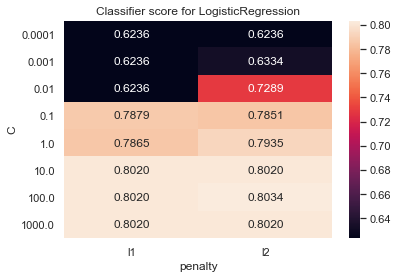

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_not_scaled = features
y = target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_not_scaled) #X est maintenant un tableau np normalisé, l'avantage de MinMaxScaler c'est que ca ne touche pas les dummy

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

cv = KFold(4, random_state = 42, shuffle = True) #
model_logistic = LogisticRegression()


log_cols = ["C", "penalty", "cross_val_score"]
log = pd.DataFrame(columns=log_cols)

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

dic = {
      'C' : [] ,
      'penalty' : [] ,
      'cross_val_score': []
      }

for c in C:
    for p in penalty:
        dic['C'].append(c)
        dic['penalty'].append(p)
        score = cross_val_score(LogisticRegression(C=c, penalty=p, solver='liblinear'), X_train, y_train, cv=cv).mean()
        dic['cross_val_score'].append(score)

df = pd.DataFrame(dic)

plt.figure()

plt.xlabel('cross_val_score')
plt.title('Classifier score for LogisticRegression')

heatmap_data = df.pivot("C", "penalty", "cross_val_score")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.4f')

In [84]:
model_LR = LogisticRegression(C=10, penalty='l2', solver='liblinear')
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)

0.8044692737430168

In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]) , 'penalty': ['l1','l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
print(grid.best_score_, grid.best_params_)

0.7921008568895893 {'C': 1.0, 'penalty': 'l2'}


In [99]:
params = grid.best_params_
best_model_LR = LogisticRegression(C = params['C'], penalty = params['penalty'])
results_log = best_model_LR.fit(X_train, y_train)
results_log.score(X_test, y_test)

0.7988826815642458

In [100]:
from sklearn.metrics import confusion_matrix
y_true = np.array(y_test)
y_pred = results_log.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(matrix)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,89,16
Actual 1,20,54


In [105]:
unique, counts = np.unique(y_true, return_counts=True)
total = dict(zip(unique, counts))

True_positive = cm_df.iloc[1,1]
True_negative = cm_df.iloc[0,0]
False_positive = cm_df.iloc[0,1]
False_negative = cm_df.iloc[1,0]


print('True positive is : ' +str(True_positive) + " out of the "+ str(total[1]) + " who survived were correctly identified")
print('True negative is : ' +str(True_negative) + " out of the "+ str(total[0]) + " who died were correctly identified")
print('False negative is : ' +str(False_positive) + " out of the "+ str(total[1]) + "  who survived were incorrectly identified to be dead")
print('False positive is : ' +str(False_negative) + " out of the "+ str(total[0]) + " who died but were incorrectly identified to be alive")

True positive is : 54 out of the 74 who survived were correctly identified
True negative is : 89 out of the 105 who died were correctly identified
False negative is : 16 out of the 74  who survived were incorrectly identified to be dead
False positive is : 20 out of the 105 who died but were incorrectly identified to be alive


In [106]:
sensitivity = True_positive / (True_positive + False_negative)
specificity = True_negative / (False_positive + True_negative)
False_positive_rate = False_positive / (False_positive + True_negative)
print('sensitivity = ' + str(sensitivity))
print('specificity = ' + str(specificity))
print('False_positive_rate = ' + str(False_positive_rate))

sensitivity = 0.7297297297297297
specificity = 0.8476190476190476
False_positive_rate = 0.1523809523809524


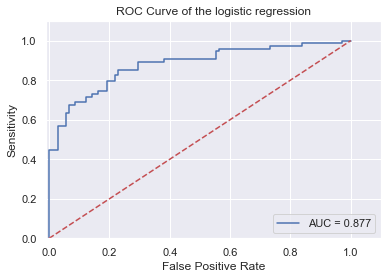

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = results_log.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of the logistic regression')
plt.show()

# KNN Classifier

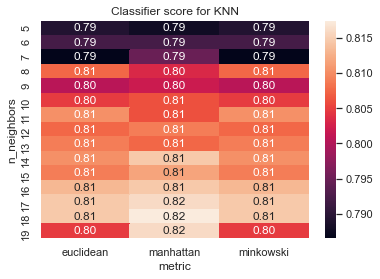

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_not_scaled = features
y = target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_not_scaled) #X est maintenant un tableau np normalisé, l'avantage de MinMaxScaler c'est que ca ne touche pas les dummy

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

cv = KFold(4, random_state = 42, shuffle = True) #
model_KNN = KNeighborsClassifier()

log_cols = ["n_neighbors", "metric", "cross_val_score"]
log = pd.DataFrame(columns=log_cols)

metric = ['minkowski','manhattan','euclidean']
n_neighbors = np.arange(5,20,1)

dic = {
    'n_neighbors' : [] ,
      'metric' : [] ,
      'cross_val_score': []
      }

for n in n_neighbors:
    for m in metric:
        dic['n_neighbors'].append(n)
        dic['metric'].append(m)
        score = cross_val_score(KNeighborsClassifier(n_neighbors=n, metric = m), X_train, y_train, cv=cv).mean()
        dic['cross_val_score'].append(score)

df = pd.DataFrame(dic)

plt.figure()

plt.xlabel('cross_val_score')
plt.title('Classifier score for KNN')

heatmap_data = df.pivot("n_neighbors", "metric", "cross_val_score")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f')

In [9]:
model_KNN = KNeighborsClassifier(n_neighbors = 18, metric = 'manhattan')
model_KNN.fit(X_train,y_train)
model_KNN.score(X_test,y_test)

0.7932960893854749

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_neighbors' : np.arange(1,20), 'metric': ['minkowski','manhattan','euclidean']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
grid.best_score_

0.8160051216389246

In [13]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 16}

In [57]:
params = grid.best_params_
best_model_KNN = KNeighborsClassifier(n_neighbors = params['n_neighbors'], metric = params['metric'])
results_log = best_model_KNN.fit(X_train, y_train)
results_log.score(X_test, y_test)

0.7988826815642458

In [58]:
from sklearn.metrics import confusion_matrix
y_true = np.array(y_test)
y_pred = results_log.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[95 10]
 [26 48]]


In [59]:
cm_df = pd.DataFrame(matrix)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,95,10
Actual 1,26,48


In [62]:
True_positive = cm_df.iloc[1,1]
True_negative = cm_df.iloc[0,0]
False_positive = cm_df.iloc[0,1]
False_negative = cm_df.iloc[1,0]


print('True positive is : ' +str(True_positive) + " People who survived correctly identified")
print('True negative is : ' +str(True_negative) + " People who died correctly identified")
print('False negative is : ' +str(False_positive) + " People who survived but incorrectly identified to dead")
print('False positive is : ' +str(False_negative) + " People who actually died but incorrectly identified to alive")

True positive is : 48 People who survived correctly identified
True negative is : 95 People who died correctly identified
False negative is : 10 People who survived but incorrectly identified to dead
False positive is : 26 People who actually died but incorrectly identified to alive


In [63]:
unique, counts = np.unique(y_true, return_counts=True)
dict(zip(unique, counts))

{0: 105, 1: 74}

In [72]:
sensitivity = True_positive / (True_positive + False_negative)
specificity = True_negative / (False_positive + True_negative)
False_positive_rate = False_positive / (False_positive + True_negative)
print('sensitivity = ' + str(sensitivity))
print('specificity = ' + str(specificity))
print('False_positive_rate = ' + str(False_positive_rate))

sensitivity = 0.6486486486486487
specificity = 0.9047619047619048
False_positive_rate = 0.09523809523809523


In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = results_log.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

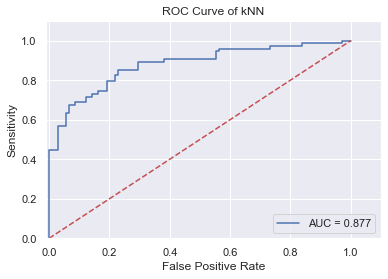

In [113]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()